###Import and load datasets

In [1]:
!pip install ir_datasets

     |████████████████████████████████| 255 kB 5.0 MB/s 
     |████████████████████████████████| 1.8 MB 46.0 MB/s 
     |████████████████████████████████| 294 kB 44.4 MB/s 
     |████████████████████████████████| 596 kB 49.8 MB/s 
     |████████████████████████████████| 72 kB 1.2 MB/s 
     |████████████████████████████████| 126 kB 51.5 MB/s 
     |████████████████████████████████| 6.4 MB 40.9 MB/s 
  Created wheel for cbor: filename=cbor-1.0.0-cp37-cp37m-linux_x86_64.whl size=51306 sha256=0da2b5dea2c86060f9ee69c63dd1b4c938196f98c6c3d497063841dc48cb7493
  Stored in directory: /root/.cache/pip/wheels/19/77/49/c9c2c8dc5848502e606e8579d0bbda18b850fb056a6c62239d
  Created wheel for warc3-wet-clueweb09: filename=warc3_wet_clueweb09-0.2.5-py3-none-any.whl size=18922 sha256=24c6be7d0f0f0bc68bdcf35e6a6e021dec4b29967c11e0be59fd62d06bf691e5
  Stored in directory: /root/.cache/pip/wheels/42/d4/3c/7c2b0c3d400ad744e4db69f2fde166655da2ed2198bfc02db6
Successfully built cbor warc3-wet-clueweb09
  Atte

In [28]:
import ir_datasets
import pandas as pd
import numpy as np
import regex as re
import string

import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.tokenize import WordPunctTokenizer

from gensim.models.doc2vec import Doc2Vec, TaggedDocument

Three pickle files are created in order to load the data quickly.

In [ ]:
""""
dataset = ir_datasets.load("cord19/trec-covid")
collection  = pd.DataFrame(columns=['docno','text','title','doi','date'])

# doc_id: str
# title: str
# doi: str
# date: str
# abstract: str

for doc in dataset.docs_iter():
  collection = collection.append({
            'docno': doc.doc_id,
            'text': doc.abstract,
            'title':doc.title,
            'doi':doc.doi,
            'date':doc.date},ignore_index=True)
  
# query_id: str
# title: str
# description: str
# narrative: str
queries  = pd.DataFrame(columns=['qid','query'])
for query in dataset.queries_iter():
  queries = queries.append({
            'qid': query.query_id,
            'query': query.title,},ignore_index=True)

qrels  = pd.DataFrame(columns=['qid','docno','label','iteration'])
for qrel in dataset.qrels_iter():
  qrels = qrels.append({
            'qid': qrel.query_id,
            'docno': qrel.doc_id,
            'label': qrel.relevance,
            'iteration': qrel.iteration,
            },ignore_index=True) 
  
collection = collection.reset_index()
queries = queries.reset_index()
qrels = qrels.reset_index()

display(collection.sample(15))
display(queries.sample(15))
display(qrels.sample(15))
"""

'"\ndataset = ir_datasets.load("cord19/trec-covid")\ncollection  = pd.DataFrame(columns=[\'docno\',\'text\',\'title\',\'doi\',\'date\'])\n\n# doc_id: str\n# title: str\n# doi: str\n# date: str\n# abstract: str\n\nfor doc in dataset.docs_iter():\n  collection = collection.append({\n            \'docno\': doc.doc_id,\n            \'text\': doc.abstract,\n            \'title\':doc.title,\n            \'doi\':doc.doi,\n            \'date\':doc.date},ignore_index=True)\n  \n# query_id: str\n# title: str\n# description: str\n# narrative: str\nqueries  = pd.DataFrame(columns=[\'qid\',\'query\'])\nfor query in dataset.queries_iter():\n  queries = queries.append({\n            \'qid\': query.query_id,\n            \'query\': query.title,},ignore_index=True)\n\nqrels  = pd.DataFrame(columns=[\'qid\',\'docno\',\'label\',\'iteration\'])\nfor qrel in dataset.qrels_iter():\n  qrels = qrels.append({\n            \'qid\': qrel.query_id,\n            \'docno\': qrel.doc_id,\n            \'label\': qrel

In [ ]:
"""
queries  = pd.DataFrame(columns=['qid','query'])
for query in dataset.queries_iter():
  queries = queries.append({
            'qid': query.query_id,
            'query_adhoc': query.title,
            'query_desc': query.description,
            'query_nar': query.narrative,},ignore_index=True)
queries = queries.reset_index()
queries.to_pickle("./queries.pkl")
queries = pd.read_pickle("./queries.pkl")
"""

'\nqueries  = pd.DataFrame(columns=[\'qid\',\'query\'])\nfor query in dataset.queries_iter():\n  queries = queries.append({\n            \'qid\': query.query_id,\n            \'query_adhoc\': query.title,\n            \'query_desc\': query.description,\n            \'query_nar\': query.narrative,},ignore_index=True)\nqueries = queries.reset_index()\nqueries.to_pickle("./queries.pkl")\nqueries = pd.read_pickle("./queries.pkl")\n'

In [5]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = '/content/gdrive/MyDrive'
base_dir = root_dir + '/Progetto IR/data'

Mounted at /content/gdrive


In [ ]:
"""
collection.to_pickle(base_dir + "/collection.pkl")
queries.to_pickle(base_dir + "/queries.pkl")
qrels.to_pickle(base_dir + "/qrels.pkl")
"""

'\ncollection.to_pickle(base_dir + "/collection.pkl")\nqueries.to_pickle(base_dir + "/queries.pkl")\nqrels.to_pickle(base_dir + "/qrels.pkl")\n'

In [6]:
collection = pd.read_pickle(base_dir + "/collection.pkl")
queries = pd.read_pickle(base_dir + "/queries.pkl")
qrels = pd.read_pickle(base_dir + "/qrels.pkl")

In [7]:
display(collection.sample(15))
display(queries.head(15))
display(qrels.sample(15))

,index,docno,text,title,doi,date
90695,90695,oqg3iwmo,Non-suicidal self-injury (NSSI) among adolesce...,Epidemiology and Determinants of Self-Injury A...,,2020
101302,101302,oaujwxhq,,PMA leading a multilateral fight against COVID-19,,2020
6898,6898,ywzpwlrb,We have studied the pathogenesis of murine cyt...,Pathogenesis of cytomegalovirus-associated pne...,10.1007/bf01309571,1992
152720,152720,ifok0gm9,"A novel virulent bacteriophage, vB_BbrM_PHB04,...",Characterisation of a newly detected bacteriop...,10.1007/s00705-018-4034-0,2018-09-18
112121,112121,nnjez9ps,,"COVID-19, radiotherapy and cancer",,2020
188829,188829,kxvkf9t8,The coronavirus disease 2019 (COVID-19) epidem...,Spatial Statistics and Influencing Factors of ...,10.3390/ijerph17113903,2020-05-31
106552,106552,mw2fzpc9,,Recognizing and Mitigating the Threat Posed by...,,2020
101283,101283,tc36bixy,,The Renin-Angiotensin-Aldosterone System in Co...,,2020
61190,61190,8vayzgwb,The lyssavirus genus of the Rhabdoviridae fami...,Development of a DNA microarray for simultaneo...,10.1016/j.virusres.2009.04.028,2009
182330,182330,x1lng449,PURPOSE: Pathological data of critical ill COV...,Late histopathologic characteristics of critic...,10.1016/j.jcrc.2020.07.002,2020-07-08


,index,qid,query,query_adhoc,query_desc,query_nar
0,0,1,NaN,coronavirus origin,what is the origin of COVID-19,seeking range of information about the SARS-Co...
1,1,2,NaN,coronavirus response to weather changes,how does the coronavirus respond to changes in...,seeking range of information about the SARS-Co...
2,2,3,NaN,coronavirus immunity,will SARS-CoV2 infected people develop immunit...,seeking studies of immunity developed due to i...
3,3,4,NaN,how do people die from the coronavirus,what causes death from Covid-19?,Studies looking at mechanisms of death from Co...
4,4,5,NaN,animal models of COVID-19,what drugs have been active against SARS-CoV o...,Papers that describe the results of testing d...
5,5,6,NaN,coronavirus test rapid testing,what types of rapid testing for Covid-19 have ...,Looking for studies identifying ways to diagno...
6,6,7,NaN,serological tests for coronavirus,are there serological tests that detect antibo...,Looking for assays that measure immune respons...
7,7,8,NaN,coronavirus under reporting,how has lack of testing availability led to un...,Looking for studies answering questions of imp...
8,8,9,NaN,coronavirus in Canada,how has COVID-19 affected Canada,"seeking data related to infections (confirm, s..."
9,9,10,NaN,coronavirus social distancing impact,has social distancing had an impact on slowing...,seeking specific information on studies that h...


,index,qid,docno,label,iteration
65736,65736,47,6xgiep8q,0,5
39265,39265,26,ey2onl0j,2,2.5
10145,10145,7,963oy9e1,0,2
50271,50271,34,bqikpnkb,0,3
13035,13035,9,0btb65c5,0,4
14950,14950,10,8ffyp3ds,0,5
34673,34673,23,7cws4293,0,1.5
9573,9573,6,vf93zmtp,2,2
45136,45136,31,0be4wta5,1,2.5
26679,26679,17,fvvx16sv,2,4.5


###Documents 


####Preprocessing

In [9]:
covid19_synonyms_nospace = ['covid19',
                    'covid2019',
                    'coronavirusdisease19',
                    'coronavirusdisease2019',
                    'coviddisease2019',
                    'coviddisease19',
                    'sarscov2', 
                    '2019ncov',
                    'ncov2019',
                    'coronavirus2019',
                    'coronavirus2',
                    'wuhanpneumonia',
                    'wuhanvirus',
                    'wuhancoronavirus',
                    'novelcoronavirus',
                    'novelcovid'
                    ]
covid19_synonyms_space =[
                         'covid 19',
                         'covid 2019',
                         'coronavirus disease 19',
                         'ncov 2019',
                         'n cov2019',
                         'n cov 2019',
                         '2019n cov',
                         '2019 ncov',
                         '2019 n cov',
                         'coronavirus 2019',
                         'coronavirus 2',
                         'wuhan pneumonia',
                         'wuhan virus',
                         'wuhan coronavirus',
                         'novel coronavirus',
                         'novel covid',
                         'covid disease 2019',
                         'coronavirus disease 2019',
                         'covid disease 19',
                         'sars cov 2',
                         'sars cov2',
                         'sarscov 2'
]

In [10]:
#defining the function to remove punctuation
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation+'‐'+'′'+'–'+'‘'+'’'+'“'+'”'])
    return punctuationfree

import nltk
nltk.download('stopwords')
stop_words = nltk.corpus.stopwords.words('english')

def remove_stopwords(text):
  tokenized_text = WordPunctTokenizer().tokenize(text)

  tokenized_text_without_stopwords = []
  for token in tokenized_text:
    if token.lower() not in stop_words:
      tokenized_text_without_stopwords.append(token)
  return " ".join(tokenized_text_without_stopwords)

def tokenization(text):
  tokenized_text = WordPunctTokenizer().tokenize(text)
  return tokenized_text

def covid_preprocess(text):
  for s in covid19_synonyms_space:
    text = text.replace(s, s.replace(" ", ""))
  return text

def remove_number_after_space(text):
  text = re.sub('\s(\d)+', ' ', text, regex=True)
  return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [11]:
from nltk.tokenize import WordPunctTokenizer
def preprocessing_first_part(t):
  t = t.apply(lambda x: x.lower())
  t = t.apply(lambda x: re.sub('-', ' ', x))
  t = t.apply(lambda x: remove_punctuation(x))
  t = t.apply(lambda x: remove_stopwords(x))
  #covid pre-processing
  t = t.apply(lambda x: covid_preprocess(x))
  t = t.apply(lambda x: remove_number_after_space(x))
  return t

In [12]:
collection['text_preprocess'] = preprocessing_first_part(collection['text'])
collection['title_preprocess'] = preprocessing_first_part(collection['title'])

In [13]:
display(collection.sample(15))

,index,docno,text,title,doi,date,text_preprocess,title_preprocess
121362,121362,amdtrasf,,Seattle's covid-19 lessons are yielding hope,,2020,,seattles covid19 lessons yielding hope
75952,75952,41v5shpt,Background: The COVID-19 epidemic is overwhelm...,Ad-hoc Assembly of Lean Extracorporeal Membran...,10.1101/2020.04.12.20061929,2020-04-17,background covid19 epidemic overwhelming inten...,ad hoc assembly lean extracorporeal membrane o...
55731,55731,vdemws0m,,Why We Should Care About Ebola in West Africa ...,10.1007/s11673-015-9677-x,2015,,care ebola west africa middle east respiratory...
20277,20277,o5yxudpi,,The blind cat or cat with retinal disease,10.1016/b978-0-7020-2488-7.50062-4,2009-05-15,,blind cat cat retinal disease
179898,179898,rjs0f0nq,This chapter will map the ethical and legal ch...,Ethical and legal challenges of artificial int...,10.1016/b978-0-12-818438-7.00012-5,2020-06-26,chapter map ethical legal challenges posed art...,ethical legal challenges artificial intelligen...
21149,21149,af5nihyi,,COPD SIG: Poster Session 2,10.1111/j.1440-1843.2008.01252_6.x,2008-03-12,,copd sig poster session
38970,38970,es7q6c90,"Among different coronavirus genera, the recept...",Evidence for a common evolutionary origin of c...,10.1128/jvi.06882-11,2012,among different coronavirus genera receptor bi...,evidence common evolutionary origin coronaviru...
22120,22120,leephp2h,,Mit dem FVDZ durch die Corona-Krise,10.1007/s13279-020-0275-x,2020-05-13,,mit dem fvdz durch die corona krise
106733,106733,rb416bbs,As the world navigates the COVID-19 health cri...,Functional assessment and function-based treat...,,2020,world navigates covid19 health crisis behavior...,functional assessment function based treatment...
135144,135144,jbchr19p,,Nursing Activities Score is increased in COVID...,10.1016/j.iccn.2020.102876,2020-04-23,,nursing activities score increased covid19 pat...


####Extract documents that refer to covid19

In [14]:
collection['search_covid19'] = np.where(collection['title_preprocess'].str.contains('|'.join(covid19_synonyms_nospace))|
                                collection['text_preprocess'].str.contains('|'.join(covid19_synonyms_nospace)), True, False)
print("Number of documents related to covid19: ", len(collection[collection.search_covid19 == True]))
collection_cov19 = collection[collection.search_covid19 == True]
display(collection_cov19)

Number of documents related to covid19:  83692


,index,docno,text,title,doi,date,text_preprocess,title_preprocess,search_covid19
4456,4456,wvx6q999,,Note from the editors: novel coronavirus (2019...,10.2807/1560-7917.es.2020.25.3.2001231,2020-01-23,,note editors novelcoronavirus2019ncov,True
4582,4582,2jq626ye,A novel coronavirus (2019-nCoV) originating in...,Therapeutic strategies in an outbreak scenario...,10.12688/f1000research.22211.2,2020-02-07,novelcoronavirus2019ncov originating wuhan chi...,therapeutic strategies outbreak scenario treat...,True
4661,4661,64q3qcjy,,Latest assessment on COVID-19 from the Europea...,10.2807/1560-7917.es.2020.25.8.2002271,2020-02-27,,latest assessment covid19 european centre dise...,True
4697,4697,bd7whqxf,,Updated rapid risk assessment from ECDC on the...,10.2807/1560-7917.es.2020.25.9.2003051,2020-03-05,,updated rapid risk assessment ecdc outbreak co...,True
4731,4731,l3ijkmwy,,Updated rapid risk assessment from ECDC on the...,10.2807/1560-7917.es.2020.25.10.2003121,2020-03-12,,updated rapid risk assessment ecdc novelcorona...,True
...,...,...,...,...,...,...,...,...,...
192503,192503,ni94qi4r,,Liver tests abnormalities in COVID-19: trick o...,10.1016/j.jhep.2020.05.033,2020-05-27,,liver tests abnormalities covid19 trick treat,True
192504,192504,z4ro6lmh,,Rapid radiological improvement of COVID-19 pne...,10.1007/s15010-020-01449-w,2020-06-15,,rapid radiological improvement covid19 pneumon...,True
192506,192506,ma3ndg41,COVID‐19 pandemic raised the issue to guarante...,Italian Society of Interventional Cardiology (...,10.1002/ccd.28888,2020-04-11,covid19 pandemic raised issue guarantee proper...,italian society interventional cardiology gise...,True
192507,192507,wh10285j,,"Nimble, Together: A Training Program's Respons...",10.1097/sla.0000000000003994,2020-04-29,,nimble together training programs response cov...,True


####Titles word-cloud

In [17]:
def create_word_cloud(d, max_words=200):
  return WordCloud(width=800, 
                   height=400,
                   background_color ='white',
                   min_font_size = 10,
                   max_words = max_words,
                   colormap='rainbow'
                   ).generate_from_frequencies(d)

In [18]:
def top_n_most_common_words(text, n):
  word_count = Counter(" ".join(text).split()).most_common(n)
  word_frequency = pd.DataFrame(word_count, columns = ['Word', 'Frequency'])
  return word_frequency

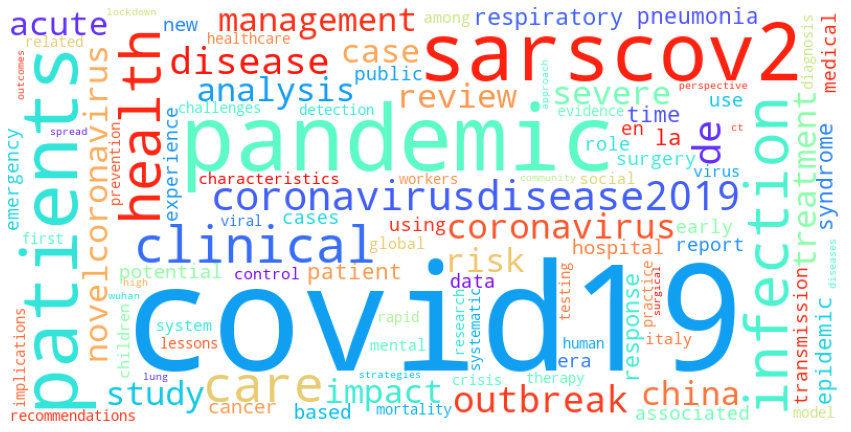

In [ ]:
titles = collection_cov19.title_preprocess.values 
titles_covid19_frequency = top_n_most_common_words(titles, 100)
d = titles_covid19_frequency.set_index('Word').T.to_dict('list')
mydict_int = dict((k, v[0]) for k,v in d.items())
wordcloud = create_word_cloud(mydict_int)
plt.figure(figsize=(15, 25))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig(base_dir + '/Word cloud/WC_titles_covid19.png')
plt.show()

#### Abstacts word-cloud

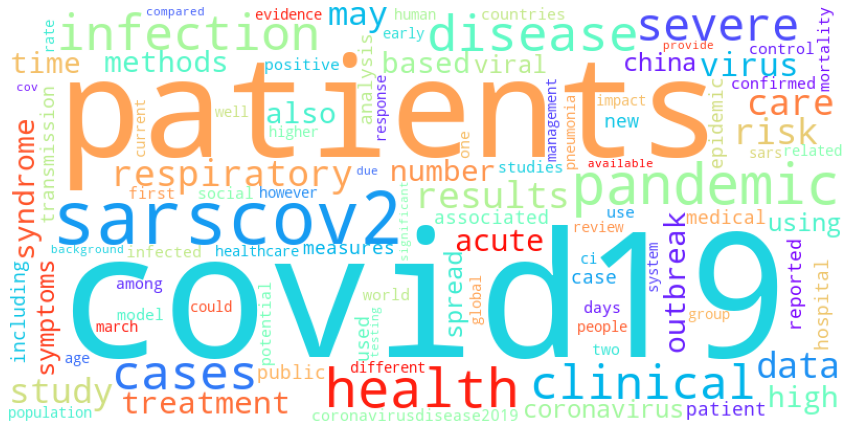

In [ ]:
texts = collection_cov19.text_preprocess.values 
texts_covid19_frequency = top_n_most_common_words(texts, 100)
d = texts_covid19_frequency.set_index('Word').T.to_dict('list')
mydict_int = dict((k, v[0]) for k,v in d.items())
wordcloud = create_word_cloud(mydict_int)
plt.figure(figsize=(15, 25))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig(base_dir + '/Word cloud/WC_texts_covid19.png')
plt.show()

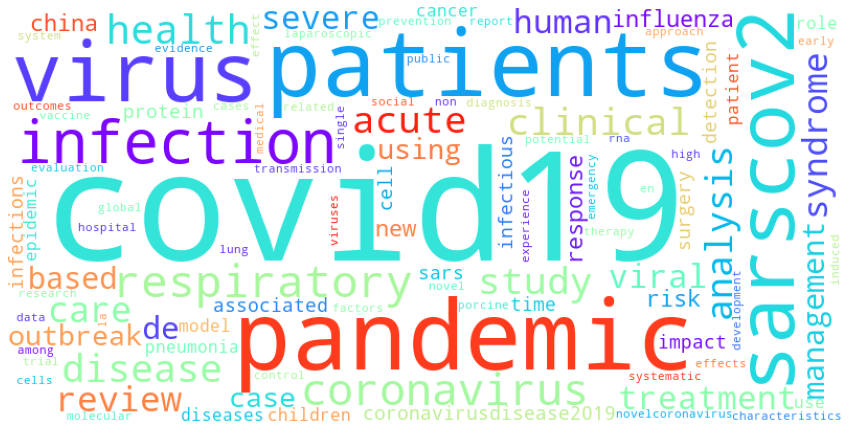

In [ ]:
titles_gen = collection.title_preprocess.values
titles_gen_covid19_frequency = top_n_most_common_words(titles_gen, 100)
d = titles_gen_covid19_frequency.set_index('Word').T.to_dict('list')
mydict_int = dict((k, v[0]) for k,v in d.items())
wordcloud = create_word_cloud(mydict_int)
plt.figure(figsize=(15, 25))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig(base_dir + '/Word cloud/WC_titles_general.png')
plt.show()


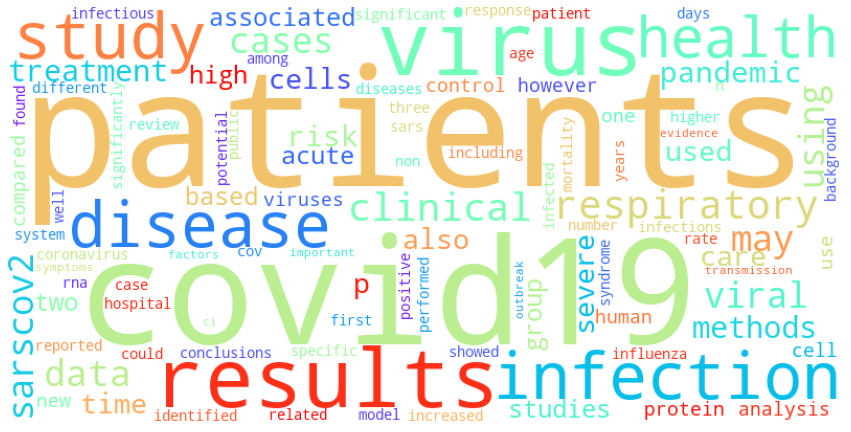

In [ ]:
texts_gen = collection.text_preprocess.values 
texts_gen_covid19_frequency = top_n_most_common_words(texts_gen, 100)
d = texts_gen_covid19_frequency.set_index('Word').T.to_dict('list')
mydict_int = dict((k, v[0]) for k,v in d.items())
wordcloud = create_word_cloud(mydict_int)
plt.figure(figsize=(15, 25))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig(base_dir + '/Word cloud/WC_texts_general.png')
plt.show()

####Documents Statistics

In [19]:
print("Number of documents in the collection: ", collection.shape[0])
print("Number of documents related to covid19 in the collection: ", collection_cov19.shape[0])

Number of documents in the collection:  192509
Number of documents related to covid19 in the collection:  83692


In [20]:
# Number of tokens
tok_preprocess_all = WordPunctTokenizer().tokenize(collection.text_preprocess.str.cat(sep=' '))
print('Preprocess total token in all documents: ', len(tok_preprocess_all))
print('Preprocess unique token in all documents: ', len(set(tok_preprocess_all)), '\n')

Preprocess total token in all documents:  17083773
Preprocess unique token in all documents:  230904 



In [ ]:
collection['token'] = collection.text_preprocess.apply(lambda x: tokenization(x))
collection_cov19['token'] = collection_cov19.text_preprocess.apply(lambda x: tokenization(x))

In [ ]:
num, num_unique = [], []
for d in collection.token:
  num.append(len(d))
  num_unique.append(len(set(d)))
print('Average Preprocess total token in all documents: ', np.mean(num))
print('Average Preprocess unique token in all documents: ', np.mean(num_unique))

Average Preprocess total token in all documents:  88.74272371681325
Average Preprocess unique token in all documents:  62.6313159384756


In [ ]:
num, num_unique = [], []
for d in collection_cov19.token:
  num.append(len(d))
  num_unique.append(len(set(d)))
print('Average Preprocess total token in covid19 documents: ', np.mean(num))
print('Average Preprocess unique token in covid19 documents: ', np.mean(num_unique))

Average Preprocess total token in covid19 documents:  69.30186875687043
Average Preprocess unique token in covid19 documents:  50.752556994694835


In [ ]:
# Number of tokens
from nltk.tokenize import WordPunctTokenizer
tok_preprocess = WordPunctTokenizer().tokenize(collection_cov19.text_preprocess.str.cat(sep=' '))
print('Preprocess total token in covid19 documents: ', len(tok_preprocess))
print('Preprocess unique token in covid19 documents: ', len(set(tok_preprocess)), '\n')

# ---- fare funzione per tornare le top n most common dato il testo

n = 15

# Most common words titles covid19
titles_covid19_frequency = top_n_most_common_words(titles, n)
print('Most ', n, ' common words in covid19 titles \n', titles_covid19_frequency, '\n')

# Most common words abstracts covid19
texts_covid19_frequency = top_n_most_common_words(texts, n)
print('Most ', n, ' common words in covid19 abstracts \n',texts_covid19_frequency, '\n')


# Most common words titles general
titles_gen_frequency = top_n_most_common_words(titles_gen, n)
print('Most ', n, ' common words in general titles \n', titles_gen_frequency, '\n')

# Most common words abstracts general
texts_gen_frequency = top_n_most_common_words(texts_gen, n)
print('Most ', n, ' common words in general abstracts \n', texts_gen_frequency, '\n')


Preprocess total token in covid19 documents:  5800012
Preprocess unique token in covid19 documents:  80969 

Most  15  common words in covid19 titles 
                       Word  Frequency
0                  covid19      65713
1                 pandemic      14930
2                 sarscov2      11573
3                 patients      10659
4                infection       5586
5                   health       4879
6                 clinical       4384
7                     care       4228
8   coronavirusdisease2019       4227
9                       de       3901
10                 disease       3703
11                outbreak       3598
12             coronavirus       3280
13                   study       3070
14              management       3012 

Most  15  common words in covid19 abstracts 
            Word  Frequency
0       covid19     131314
1      patients      77563
2      sarscov2      44158
3      pandemic      36098
4        health      32636
5       disease      29300
6  

As shown in the word clouds and in the tables, the terms relating to covid19 also appear among the most common words of the documents of the original collection. This means that covid19 remains one of the central topics even considering documents that refer to coronavirus in general.

##Queries

###Preprocessing

In [22]:
queries['adhoc_preprocess'] = preprocessing_first_part(queries['query_adhoc'])
queries['desc_preprocess'] = preprocessing_first_part(queries['query_desc'])
queries['nar_preprocess'] = preprocessing_first_part(queries['query_nar'])

In [23]:
display(queries.sample(15))

,index,qid,query,query_adhoc,query_desc,query_nar,adhoc_preprocess,desc_preprocess,nar_preprocess
45,45,46,NaN,dexamethasone coronavirus,what evidence is there for dexamethasone as a ...,Looking for studies on the impact of dexametha...,dexamethasone coronavirus,evidence dexamethasone treatment covid19,looking studies impact dexamethasone treatment...
26,26,27,NaN,coronavirus asymptomatic,what is known about those infected with Covid-...,Studies of people who are known to be infected...,coronavirus asymptomatic,known infected covid19 asymptomatic,studies people known infected covid19 show sym...
41,41,42,NaN,Vitamin D and COVID-19,Does Vitamin D impact COVID-19 prevention and ...,This includes studies describing possible role...,vitamin covid19,vitamin impact covid19 prevention treatment,includes studies describing possible role vita...
32,32,33,NaN,coronavirus vaccine candidates,What vaccine candidates are being tested for C...,"Seeking studies that discuss possible, but spe...",coronavirus vaccine candidates,vaccine candidates tested covid19,seeking studies discuss possible specific covi...
23,23,24,NaN,coronavirus diabetes,what kinds of complications related to COVID-1...,seeking specific outcomes that diabetic (any t...,coronavirus diabetes,kinds complications related covid19 associated...,seeking specific outcomes diabetic type patien...
44,44,45,NaN,coronavirus mental health impact,How has the COVID-19 pandemic impacted mental ...,Includes increasing/decreasing rates of depres...,coronavirus mental health impact,covid19 pandemic impacted mental health,includes increasingdecreasing rates depression...
12,12,13,NaN,how does coronavirus spread,what are the transmission routes of coronavirus?,Looking for information on all possible ways t...,coronavirus spread,transmission routes coronavirus,looking information possible ways contract cov...
46,46,47,NaN,COVID-19 outcomes in children,what are the health outcomes for children who ...,Looking for studies on health outcomes in chil...,covid19 outcomes children,health outcomes children contract covid19,looking studies health outcomes children relat...
19,19,20,NaN,coronavirus and ACE inhibitors,are patients taking Angiotensin-converting enz...,Looking for information on interactions betwee...,coronavirus ace inhibitors,patients taking angiotensin converting enzyme ...,looking information interactions coronavirus a...
38,38,39,NaN,COVID-19 cytokine storm,What is the mechanism of cytokine storm syndro...,Looking for studies that describes mechanism o...,covid19 cytokine storm,mechanism cytokine storm syndrome covid19,looking studies describes mechanism developmen...


Function that measures the pairwise similarity of the provided queries

In [24]:
def pairwise_similarity(representation, query1_id, query2_id, format):
  if representation == 'tfidf':
    if format == 'adhoc':
      similarity = tfidf_queries_adhoc_cos_df.iat[int(query1_id)-1, int(query2_id)-1]
    elif format == 'desc':
      similarity = tfidf_queries_desc_cos_df.iat[int(query1_id)-1, int(query2_id)-1]
    elif format == 'nar':
      similarity = tfidf_queries_nar_cos_df.iat[int(query1_id)-1, int(query2_id)-1]

  elif representation == 'doc2vec':
    if format == 'adhoc':
      similarity = d2v_queries_adhoc_cos_df.iat[int(query1_id)-1, int(query2_id)-1]
    elif format == 'desc':
      similarity = d2v_queries_desc_cos_df.iat[int(query1_id)-1, int(query2_id)-1]
    elif format == 'nar':
      similarity = d2v_queries_nar_cos_df.iat[int(query1_id)-1, int(query2_id)-1]

  return similarity


List of similar queries

In [26]:
def most_similar_queries(representation, query_id, format, threshold):
  if representation == 'tfidf':
    if format == 'adhoc':
      vector_similarity = tfidf_queries_adhoc_cos_df[int(query_id)-1]
    elif format == 'desc':
      vector_similarity = tfidf_queries_desc_cos_df[int(query_id)-1]
    elif format == 'nar':
      vector_similarity = tfidf_queries_nar_cos_df[int(query_id)-1]

  elif representation == 'doc2vec':
    if format == 'adhoc':
      vector_similarity = d2v_queries_adhoc_cos_df[int(query_id)-1]
    elif format == 'desc':
      vector_similarity = d2v_queries_desc_cos_df[int(query_id)-1]
    elif format == 'nar':
      vector_similarity = d2v_queries_nar_cos_df[int(query_id)-1]

  most_similar_queries = [[i, q] for (i, q) in zip(range(1, len(vector_similarity)), vector_similarity) if q >= threshold]
  return most_similar_queries

###Tf-idf

In [ ]:
tfidf_vectorizer = TfidfVectorizer(min_df=0., max_df=1., use_idf=True)
tfidf = tfidf_vectorizer.fit_transform(collection.text_preprocess)


In [ ]:
tfidf_queries_adhoc_vector = tfidf_vectorizer.transform(queries.adhoc_preprocess)
tfidf_queries_adhoc_cos = cosine_similarity(tfidf_queries_adhoc_vector, tfidf_queries_adhoc_vector)

In [ ]:
tfidf_queries_adhoc_cos_df = pd.DataFrame(tfidf_queries_adhoc_cos)
tfidf_queries_adhoc_cos_df.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
0,1.000000,0.181536,0.299676,0.216693,0.0,0.225015,0.215012,0.286717,0.250498,0.213612,0.180645,0.279008,0.356570,0.150470,0.221668,0.164610,0.283474,0.216235,0.118608,0.197913,0.355421,0.213365,0.277721,0.287001,0.255324,0.284495,0.294567,0.259349,0.203432,0.236354,0.211466,0.241939,0.223260,0.294091,0.222192,0.0,0.0,0.000000,0.000000,0.275935,0.000000,0.000000,0.0,0.202930,0.226601,0.205246,0.000000,0.168392,0.000000,0.227321
1,0.181536,1.000000,0.193855,0.140175,0.0,0.145558,0.139088,0.185472,0.162042,0.138182,0.116856,0.180485,0.230659,0.097337,0.143393,0.106483,0.183374,0.139878,0.076725,0.128026,0.229915,0.138022,0.179652,0.185656,0.165165,0.184035,0.190550,0.167768,0.131596,0.152893,0.136793,0.156506,0.144423,0.190242,0.143732,0.0,0.0,0.157383,0.000000,0.178497,0.000000,0.000000,0.0,0.131272,0.146584,0.132770,0.000000,0.108930,0.000000,0.147050
2,0.299676,0.193855,1.000000,0.231397,0.0,0.240284,0.229603,0.306173,0.267496,0.228108,0.192903,0.297941,0.380766,0.160681,0.236710,0.175780,0.302710,0.230908,0.126657,0.211343,0.379539,0.227844,0.296566,0.306476,0.272650,0.303800,0.314556,0.276947,0.217237,0.252392,0.225815,0.258356,0.238410,0.314047,0.237269,0.0,0.0,0.000000,0.000000,0.294660,0.000000,0.000000,0.0,0.216700,0.241977,0.219174,0.000000,0.179819,0.534296,0.242747
3,0.216693,0.140175,0.231397,1.000000,0.0,0.173747,0.166023,0.221391,0.193423,0.164942,0.139486,0.215438,0.275328,0.116187,0.171162,0.127105,0.218886,0.166967,0.091584,0.152819,0.274440,0.164752,0.214444,0.221610,0.197150,0.219675,0.227452,0.200258,0.157081,0.182502,0.163285,0.186815,0.172392,0.227084,0.171567,0.0,0.0,0.000000,0.000000,0.213065,0.000000,0.000000,0.0,0.156694,0.174971,0.158482,0.000000,0.130025,0.000000,0.175528
4,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.111203,0.000000,0.092165,0.127932,0.0,0.000000,0.000000,0.000000,0.148132,0.000000,0.122944,0.000000


In [ ]:
tfidf_queries_desc_vector = tfidf_vectorizer.transform(queries.desc_preprocess)
tfidf_queries_desc_cos = cosine_similarity(tfidf_queries_desc_vector, tfidf_queries_desc_vector)

In [ ]:
tfidf_queries_desc_cos_df = pd.DataFrame(tfidf_queries_desc_cos)
tfidf_queries_desc_cos_df.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
0,1.000000,0.0,0.000000,0.155698,0.000000,0.120142,0.000000,0.067255,0.130674,0.089687,0.000000,0.0,0.000000,0.083031,0.000000,0.000000,0.000000,0.103852,0.070243,0.071087,0.0,0.122257,0.094208,0.095216,0.0,0.164678,0.135892,0.101757,0.000000,0.122284,0.000000,0.000000,0.120483,0.096118,0.108242,0.000000,0.000000,0.109294,0.103841,0.000000,0.065943,0.107954,0.057840,0.093767,0.109871,0.10912,0.101240,0.071350,0.062400,0.000000
1,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.097444,0.000000,0.000000,0.000000,0.097549,0.0,0.128697,0.000000,0.097911,0.095042,0.143543,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.095635,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.0,1.000000,0.000000,0.085534,0.000000,0.000000,0.000000,0.000000,0.000000,0.098843,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.136173,0.000000,0.052468,0.000000,0.000000,0.127512,0.000000,0.000000,0.000000,0.112279,0.089511,0.000000,0.000000,0.064426,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.119300,0.102189
3,0.155698,0.0,0.000000,1.000000,0.000000,0.105731,0.000000,0.059187,0.114999,0.078928,0.000000,0.0,0.000000,0.073071,0.000000,0.000000,0.000000,0.091394,0.061817,0.062560,0.0,0.107592,0.082907,0.083795,0.0,0.144924,0.119591,0.089551,0.000000,0.107615,0.000000,0.000000,0.106030,0.084588,0.095258,0.000000,0.000000,0.096183,0.091384,0.000000,0.058032,0.095005,0.050902,0.082519,0.096691,0.09603,0.089095,0.062791,0.054915,0.000000
4,0.000000,0.0,0.085534,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.159532,0.000000,0.000000,0.139157,0.000000,0.000000,0.000000,0.122532,0.097686,0.000000,0.000000,0.070310,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.111522


In [ ]:
tfidf_queries_nar_vector = tfidf_vectorizer.transform(queries.nar_preprocess)
tfidf_queries_nar_cos = cosine_similarity(tfidf_queries_nar_vector, tfidf_queries_nar_vector)

In [ ]:
tfidf_queries_nar_cos_df = pd.DataFrame(tfidf_queries_nar_cos)
tfidf_queries_nar_cos_df.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
0,1.000000,0.275275,0.179759,0.000000,0.079786,0.000000,0.000000,0.000000,0.144581,0.203314,0.182917,0.213899,0.048602,0.143218,0.353460,0.027265,0.131217,0.000000,0.000000,0.042131,0.192672,0.236775,0.131633,0.133680,0.041292,0.050611,0.000000,0.000000,0.179539,0.254363,0.000000,0.000000,0.090747,0.169266,0.147825,0.000000,0.110073,0.065353,0.041105,0.000000,0.054235,0.000000,0.026052,0.100224,0.000000,0.024062,0.000000,0.000000,0.026655,0.025163
1,0.275275,1.000000,0.136599,0.000000,0.048912,0.000000,0.000000,0.000000,0.138941,0.184819,0.173040,0.243097,0.073866,0.146835,0.204238,0.020719,0.099711,0.000000,0.040316,0.064030,0.288398,0.223990,0.133237,0.135310,0.062755,0.000000,0.000000,0.000000,0.193184,0.240627,0.000000,0.023932,0.068958,0.218074,0.115681,0.034860,0.083644,0.030862,0.031235,0.025879,0.061694,0.000000,0.023741,0.055216,0.070995,0.019093,0.022880,0.013117,0.000000,0.000000
2,0.179759,0.136599,1.000000,0.058206,0.065422,0.043379,0.134231,0.034571,0.148397,0.156054,0.177949,0.165777,0.000000,0.087157,0.097851,0.054024,0.134681,0.207446,0.038686,0.034030,0.221851,0.319471,0.135107,0.137209,0.033352,0.122903,0.062437,0.037015,0.146398,0.197138,0.029691,0.000000,0.115111,0.162128,0.129014,0.033451,0.089787,0.027141,0.027469,0.113108,0.040236,0.026145,0.000000,0.123203,0.000000,0.026397,0.093195,0.000000,0.217843,0.055211
3,0.000000,0.000000,0.058206,1.000000,0.000000,0.487135,0.348192,0.422787,0.000000,0.049933,0.033426,0.039088,0.346566,0.000000,0.000000,0.043656,0.031756,0.060238,0.103533,0.268983,0.035209,0.127515,0.000000,0.000000,0.263627,0.086453,0.167095,0.099060,0.000000,0.046482,0.079459,0.000000,0.123516,0.082808,0.024268,0.342206,0.442718,0.304782,0.308471,0.327200,0.299983,0.096106,0.244466,0.410699,0.000000,0.296430,0.436645,0.191370,0.328379,0.356284
4,0.079786,0.048912,0.065422,0.000000,1.000000,0.000000,0.083359,0.045581,0.000000,0.000000,0.000000,0.021096,0.000000,0.000000,0.000000,0.021453,0.011917,0.031953,0.020872,0.000000,0.000000,0.000000,0.017193,0.017461,0.000000,0.027343,0.000000,0.000000,0.097359,0.000000,0.000000,0.145539,0.000000,0.016694,0.057048,0.079269,0.051889,0.079879,0.080846,0.013398,0.000000,0.000000,0.000000,0.024911,0.000000,0.014947,0.014606,0.000000,0.046517,0.010356


###Doc2vec

In [27]:
collection['token'] = collection.text_preprocess.apply(lambda x: tokenization(x))

In [ ]:
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(collection['token'])]
doc_model = Doc2Vec(documents, window=2, min_count=1, workers=4)

In [ ]:
# save the model if after is needed
model_dir = base_dir + "/Model/"
doc_model.save(model_dir + "doc2vec.model")

In [ ]:
queries['token_adhoc'] = queries.adhoc_preprocess.apply(lambda x: tokenization(x))
queries['token_desc'] = queries.desc_preprocess.apply(lambda x: tokenization(x))
queries['token_nar'] = queries.nar_preprocess.apply(lambda x: tokenization(x))

In [ ]:
# for every queries adhoc contains its tokens
d2v_queries_adhoc_embeddings = np.array([doc_model.infer_vector(queries.token_adhoc[i]) for i in range(queries.shape[0])])
d2v_queries_adhoc_cos = cosine_similarity(d2v_queries_adhoc_embeddings, d2v_queries_adhoc_embeddings)

In [ ]:
d2v_queries_adhoc_cos_df = pd.DataFrame(d2v_queries_adhoc_cos)
d2v_queries_adhoc_cos_df.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
0,1.000000,0.583272,0.496714,0.642475,-0.052614,0.458088,0.495641,0.316572,0.547055,0.666511,0.239984,0.436839,0.346245,0.434421,0.577688,0.392981,0.589047,0.328950,0.465015,0.676493,0.494164,0.387303,0.386820,0.493741,0.454505,0.339758,0.512360,0.290037,0.605273,0.382500,0.302026,0.619516,0.525676,0.436341,0.535368,-0.021855,0.087783,0.031191,0.016410,0.356675,0.040330,0.012462,-0.008747,0.296541,0.653638,0.485018,-0.061358,0.388699,0.173517,0.370034
1,0.583272,1.000000,0.569762,0.726219,-0.019735,0.528804,0.561918,0.549909,0.699974,0.757912,0.414167,0.642492,0.206278,0.603988,0.684054,0.425972,0.705222,0.409336,0.428946,0.777652,0.619904,0.531652,0.502202,0.603792,0.564411,0.422149,0.549974,0.514118,0.754262,0.534684,0.509350,0.578575,0.607759,0.622490,0.602462,-0.058527,0.069930,0.048513,-0.036074,0.342856,-0.036530,0.062691,0.082479,0.294321,0.755531,0.662396,-0.004340,0.565357,0.175909,0.442655
2,0.496714,0.569762,1.000000,0.569600,-0.011673,0.416037,0.513833,0.349349,0.567255,0.598200,0.192036,0.497374,0.226409,0.424748,0.546939,0.493626,0.548994,0.335502,0.400537,0.623752,0.523877,0.242746,0.367259,0.541069,0.442991,0.300752,0.579742,0.428288,0.576304,0.359102,0.272384,0.539043,0.481197,0.415493,0.320531,-0.038063,0.056406,0.019192,-0.034273,0.358400,-0.012298,0.153490,0.165232,0.332316,0.622306,0.575397,0.028796,0.458103,0.513711,0.351798
3,0.642475,0.726219,0.569600,1.000000,0.041961,0.604315,0.696085,0.572020,0.742041,0.856517,0.442181,0.564474,0.383268,0.693878,0.788499,0.507951,0.840343,0.412205,0.597744,0.893273,0.680910,0.495476,0.506950,0.661965,0.609926,0.391926,0.625259,0.614337,0.880335,0.604136,0.469719,0.604836,0.684780,0.600455,0.628954,-0.051451,0.123767,0.162398,0.022384,0.441200,0.083186,0.089775,-0.051347,0.268424,0.867292,0.717387,-0.079205,0.502292,0.121767,0.436748
4,-0.052614,-0.019735,-0.011673,0.041961,1.000000,0.465210,0.353205,-0.347268,-0.077468,0.032219,-0.198404,-0.085452,0.389131,0.309841,0.208110,-0.084707,0.145225,0.039504,-0.008648,0.066226,-0.099760,-0.363175,-0.231067,-0.205562,-0.020116,0.209605,-0.167619,-0.001331,0.101953,-0.127868,-0.288783,0.125784,0.315671,0.009102,-0.318710,0.543367,0.377913,0.353026,0.634562,0.021460,0.788245,0.362674,-0.003107,-0.283513,0.090791,-0.062709,0.405987,-0.097882,0.055640,-0.202561


In [ ]:
# for every queries desc contains its tokens
d2v_queries_desc_embeddings = np.array([doc_model.infer_vector(queries.token_desc[i]) for i in range(queries.shape[0])])
d2v_queries_desc_cos = cosine_similarity(d2v_queries_desc_embeddings, d2v_queries_desc_embeddings)

In [ ]:
d2v_queries_desc_cos_df = pd.DataFrame(d2v_queries_desc_cos)
d2v_queries_desc_cos_df.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
0,1.000000,0.028260,0.611801,0.624259,0.395476,0.181481,0.587740,0.536308,0.423878,0.534742,0.016876,0.505539,0.423982,0.344764,-0.301765,-0.091089,0.024504,0.526995,0.036704,0.609007,0.554987,0.386031,0.157087,0.161678,0.653655,0.628456,0.378715,0.244158,0.611820,0.564142,0.396995,0.431671,0.580550,0.474908,0.292955,0.590282,0.599472,0.479769,0.447127,0.614534,0.589587,0.430286,0.043681,0.128897,0.468774,0.167808,0.507421,0.562314,0.530103,0.019275
1,0.028260,1.000000,-0.020323,0.019652,-0.135552,-0.036635,0.256943,0.036176,0.128298,0.012102,0.351140,-0.125181,0.403926,-0.010719,0.304695,0.379375,0.375353,-0.045797,0.075824,-0.002888,-0.002000,-0.086815,0.071592,-0.021086,0.025915,-0.018321,-0.143886,-0.025546,-0.012875,-0.163814,0.364025,0.003970,0.040400,0.054724,0.069396,-0.020204,0.044000,0.045657,-0.004366,-0.046512,-0.077853,0.069929,-0.058749,0.142016,0.064267,-0.030863,-0.040286,0.027385,-0.082422,0.179786
2,0.611801,-0.020323,1.000000,0.764461,0.499453,0.246800,0.601152,0.650298,0.339332,0.657936,-0.180827,0.438333,0.528515,0.334329,-0.299322,-0.013699,-0.025801,0.518574,-0.150257,0.656533,0.718956,0.426655,0.333885,0.309444,0.723041,0.701534,0.499170,0.234102,0.744640,0.587774,0.361526,0.304791,0.622932,0.555678,0.367036,0.701389,0.661878,0.487165,0.232284,0.695857,0.734539,0.368647,0.063954,0.242138,0.620042,0.113803,0.612415,0.719654,0.735858,-0.108635
3,0.624259,0.019652,0.764461,1.000000,0.603698,0.169055,0.685464,0.673463,0.434352,0.731022,-0.105423,0.605800,0.611861,0.386096,-0.274182,0.022473,-0.009935,0.572264,-0.067805,0.721966,0.720443,0.581475,0.279291,0.243231,0.767198,0.787162,0.499411,0.283161,0.799630,0.666794,0.411454,0.412786,0.668690,0.595571,0.275168,0.806383,0.713866,0.436354,0.425543,0.827538,0.779080,0.451591,0.065218,0.400096,0.608555,0.144371,0.728059,0.792922,0.757183,-0.071444
4,0.395476,-0.135552,0.499453,0.603698,1.000000,0.069239,0.393724,0.506808,0.183077,0.536949,-0.303580,0.452444,0.388276,0.411031,-0.296159,-0.121997,0.002489,0.331287,-0.006497,0.541806,0.544078,0.518562,0.033911,0.092622,0.557088,0.610741,0.537782,0.229062,0.603985,0.629943,0.222533,0.451153,0.413240,0.437643,0.208533,0.662043,0.505520,0.238924,0.382163,0.642632,0.696122,0.398848,0.048095,0.172393,0.453448,0.138970,0.476390,0.570852,0.475105,-0.105120


In [ ]:
# for every queries nar contains its tokens
d2v_queries_nar_embeddings = np.array([doc_model.infer_vector(queries.token_nar[i]) for i in range(queries.shape[0])])
d2v_queries_nar_cos = cosine_similarity(d2v_queries_nar_embeddings, d2v_queries_nar_embeddings)

In [ ]:
d2v_queries_nar_cos_df = pd.DataFrame(d2v_queries_nar_cos)
d2v_queries_nar_cos_df.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
0,1.000000,0.467116,0.117318,0.179777,-0.262280,0.223876,0.039375,0.293165,-0.101480,0.170370,0.150878,0.196021,0.160793,0.524900,0.126258,-0.191224,0.138007,0.355688,-0.070012,-0.243136,0.296126,0.104304,-0.180724,-0.197470,0.190832,0.170871,-0.120937,0.269170,0.320140,0.371708,0.243690,-0.298339,-0.039586,0.271312,0.196517,-0.020300,0.512450,0.219889,0.371702,0.036188,0.005444,0.352944,-0.031891,-0.138091,0.398066,-0.026825,0.092548,0.223694,-0.017085,-0.122404
1,0.467116,1.000000,0.063481,0.169166,-0.015228,0.304146,0.021316,0.185647,0.080265,0.123156,0.521213,0.450885,0.327545,0.500036,0.263704,-0.032355,0.011093,0.530006,0.254507,-0.148289,0.447576,0.177779,0.098622,0.142684,0.546123,-0.140719,-0.209827,0.365514,0.474969,0.494636,0.206156,-0.277139,0.078890,0.403555,0.266551,0.097783,0.606896,0.182709,0.017674,0.008954,0.083350,0.419811,0.119276,-0.159286,0.411683,-0.150503,0.034512,0.409436,0.037454,0.031162
2,0.117318,0.063481,1.000000,0.195044,0.101307,0.362082,0.132411,0.392704,0.320419,0.294595,0.254812,0.108444,0.033838,0.172962,0.086050,0.084042,0.250635,0.223691,0.179157,0.052807,0.086176,0.204714,0.297301,0.269727,0.112209,0.200628,0.188920,0.152369,0.158273,0.134065,0.048248,0.101280,0.263944,0.181252,0.030891,0.397505,0.221473,0.136993,0.182085,0.232837,0.422662,0.168731,0.111529,0.218531,0.149325,0.092928,0.133395,-0.031481,0.272775,-0.060670
3,0.179777,0.169166,0.195044,1.000000,0.111953,0.099263,0.232411,-0.031062,0.348400,0.149530,0.011499,-0.061564,0.161267,-0.052862,0.077445,0.065747,0.003007,0.017954,-0.144254,0.172421,0.275299,0.253943,0.060585,-0.056620,0.059154,0.015399,0.157668,0.019648,0.001578,-0.105366,-0.035523,0.061359,0.045749,0.010023,0.205032,0.004877,0.021765,0.131544,0.107916,0.152458,0.143654,0.061708,0.066687,0.095448,-0.056850,-0.005971,0.187952,-0.072243,0.108194,-0.048572
4,-0.262280,-0.015228,0.101307,0.111953,1.000000,0.200502,0.163638,0.032616,0.221872,0.099461,-0.042042,-0.048077,0.248374,-0.149610,-0.015285,0.282512,0.192714,-0.137081,0.095591,0.231092,-0.114997,0.010863,-0.001950,0.036312,0.157516,0.056619,0.357897,0.023421,-0.027616,-0.132739,-0.117070,0.144547,0.412718,0.053586,0.341199,0.145704,-0.035227,0.087760,0.024101,-0.074249,0.203684,-0.024584,0.136262,0.299771,-0.151747,0.091160,0.046733,0.012977,0.131303,0.126707


Word-cloud of qids of similar queries

In [ ]:
msq = most_similar_queries('doc2vec',queries.iloc[0].qid, 'adhoc', 0.5)
msq = [[str(e[0]), e[1]] for e in msq]

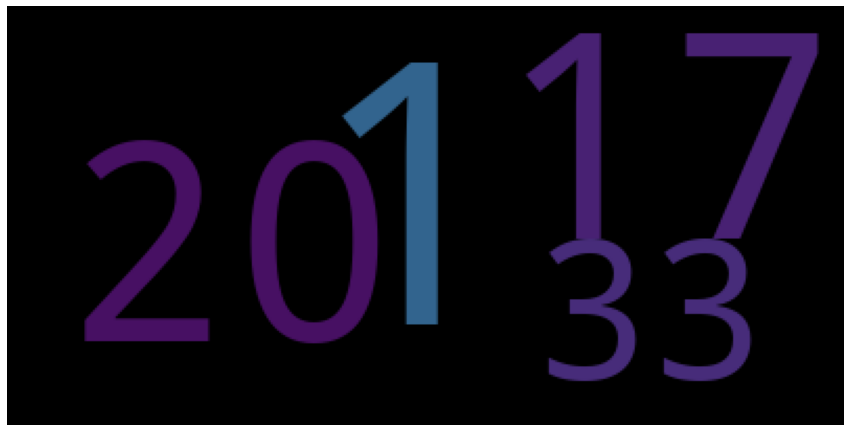

In [ ]:
if len(msq) >=1:
  wordcloud = WordCloud().generate_from_frequencies(dict(msq))
  plt.figure(figsize=(15, 25))
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.show()

###Statistics

In [ ]:
print("Number of queries: ", queries.shape[0])

Number of queries:  50


In [ ]:
# Most common words titles covid19
adhoc = queries.adhoc_preprocess.values 
desc = queries.desc_preprocess.values 
nar = queries.nar_preprocess.values 
n = 10
adhoc_frequency = top_n_most_common_words(adhoc, n)
desc_frequency = top_n_most_common_words(desc, n)
nar_frequency = top_n_most_common_words(nar, n)
print('Most ', n, ' common words adhoc queries \n', adhoc_frequency, '\n')
print('Most ', n, ' common words desc queries \n', desc_frequency, '\n')
print('Most ', n, ' common words nar queries \n', nar_frequency, '\n')

Most  10  common words adhoc queries 
           Word  Frequency
0  coronavirus         40
1      covid19          6
2       impact          3
3     response          2
4     immunity          2
5        masks          2
6      vaccine          2
7     sarscov2          2
8       origin          1
9      weather          1 

Most  10  common words desc queries 
             Word  Frequency
0        covid19         31
1    coronavirus          8
2       sarscov2          8
3        related          4
4  complications          4
5       infected          3
6         impact          3
7       patients          3
8       evidence          3
9      infection          3 

Most  10  common words nar queries 
           Word  Frequency
0      studies         30
1      covid19         29
2      looking         20
3      seeking         19
4  information         17
5        virus         12
6    infection         10
7     specific         10
8     sarscov2          9
9     outcomes          9 



In [ ]:
n = 100
adhoc_frequency = top_n_most_common_words(adhoc, n)
desc_frequency = top_n_most_common_words(desc, n)
nar_frequency = top_n_most_common_words(nar, n)

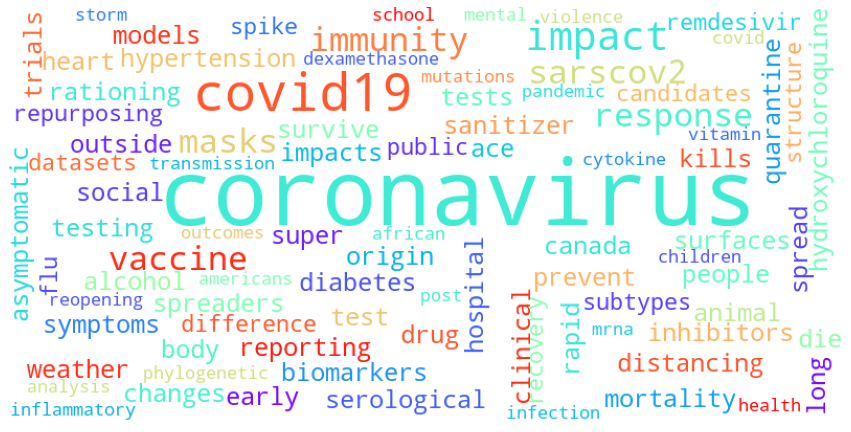

In [ ]:
d = adhoc_frequency.set_index('Word').T.to_dict('list')
mydict_int = dict((k, v[0]) for k,v in d.items())
wordcloud = create_word_cloud(mydict_int)
plt.figure(figsize=(15, 25))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig(base_dir + '/Word cloud/WC_adhoc.png')
plt.show()

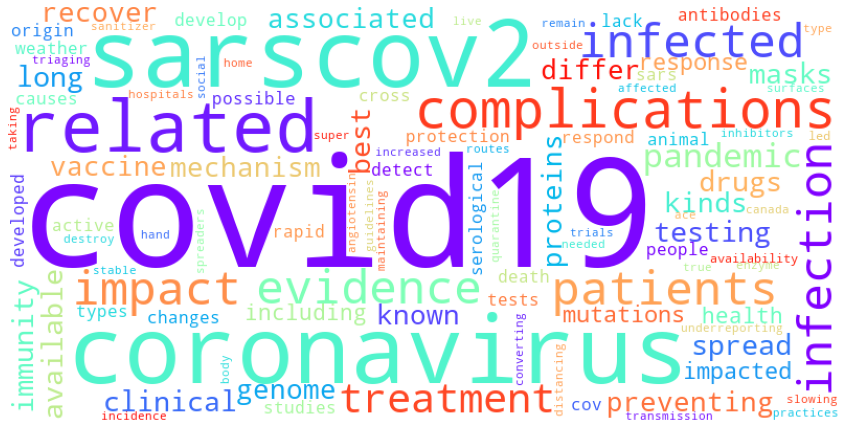

In [ ]:
d = desc_frequency.set_index('Word').T.to_dict('list')
mydict_int = dict((k, v[0]) for k,v in d.items())
wordcloud = create_word_cloud(mydict_int)
plt.figure(figsize=(15, 25))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig(base_dir + '/Word cloud/WC_desc.png')
plt.show()

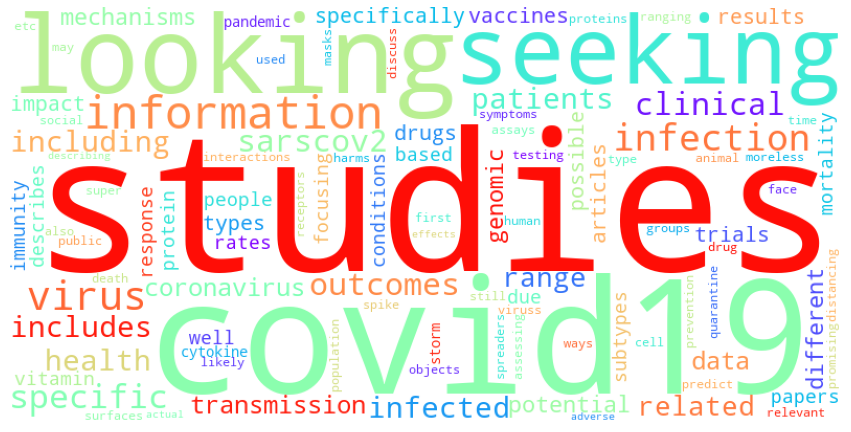

In [ ]:
d = nar_frequency.set_index('Word').T.to_dict('list')
mydict_int = dict((k, v[0]) for k,v in d.items())
wordcloud = create_word_cloud(mydict_int)
plt.figure(figsize=(15, 25))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig(base_dir + '/Word cloud/WC_nar.png')
plt.show()